### sample 74

In [114]:
setwd('/import/jliu//data2/')

In [115]:
load('sample74.model.gene.rda')

In [116]:
head(da2,2)

,sample,FAM200B,BCL2A1,IGJ,TXN
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C10,4.886505,22.32717,21.40125,7.655688
2,C11,6.201921,32.12134,21.30293,17.794071


In [117]:
cli74 = read.table('./sample74.cli.txt',header =T,sep = '\t')

In [118]:
head(cli74,2)

,group,sample,gender,age,BMI,Hb,RBC,WBC,PLT,ALT,...,UA,GLU,TG,TC,HDL.c,LDL.C,ApoA,ApoB,LP,HCY
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,CI,CI2,1,52,43.02772,164,5.16,6.79,281,63.6,...,226,4.9,2.2,4.59,1.52,1.98,1.55,0.70,NA,11.4
2,CI,CI3,1,61,51.90311,NA,NA,NA,NA,123.6,...,264,4.3,1.0,3.57,0.90,1.80,0.98,0.62,NA,14.7


In [119]:
input = merge(da2,cli74,by.x= 'sample',by.y = 'sample')

In [120]:
head(input,2)

,sample,FAM200B,BCL2A1,IGJ,TXN,group,gender,age,BMI,Hb,...,UA,GLU,TG,TC,HDL.c,LDL.C,ApoA,ApoB,LP,HCY
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,C1,5.615827,28.66226,37.85341,10.132857,CTR,1,54,21.45329,186,...,315,5.0,1.1,3.84,1.37,1.88,1.38,0.67,NA,18.1
2,C10,4.886505,22.32717,21.40125,7.655688,CTR,1,56,25.76298,151,...,364,5.3,1.4,5.91,1.25,3.51,1.27,1.12,NA,13.5


In [121]:
load('./GSVA_hall.RDA')

In [122]:
input2 = merge(a,input,by.x= 'sample',by.y = 'sample')

In [123]:
head(input2,2)

,sample,Hscore,FAM200B,BCL2A1,IGJ,TXN,group,gender,age,BMI,...,UA,GLU,TG,TC,HDL.c,LDL.C,ApoA,ApoB,LP,HCY
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,C1,-0.6396225,5.615827,28.66226,37.85341,10.132857,CTR,1,54,21.45329,...,315,5.0,1.1,3.84,1.37,1.88,1.38,0.67,NA,18.1
2,C10,-0.9159736,4.886505,22.32717,21.40125,7.655688,CTR,1,56,25.76298,...,364,5.3,1.4,5.91,1.25,3.51,1.27,1.12,NA,13.5


In [124]:
library(ggplot2)

In [125]:
library(ggplot2)
library(ggpubr)

In [126]:
colnames(input2)

[1] "sample"  "Hscore"  "FAM200B" "BCL2A1"  "IGJ"     "TXN"     "group"  
 [8] "gender"  "age"     "BMI"     "Hb"      "RBC"     "WBC"     "PLT"    
[15] "ALT"     "AST"     "TBIL"    "DBIL"    "CR"      "BUN"     "UA"     
[22] "GLU"     "TG"      "TC"      "HDL.c"   "LDL.C"   "ApoA"    "ApoB"   
[29] "LP"      "HCY"

In [127]:
CS = input2[,c('group','LDL.C')]

In [128]:
CS$LDL.CD == ifelse(CS$LDL.CD > 3.4 ,'bad','good')

logical(0)

In [129]:
table()

ERROR: Error in table(): nothing to tabulate


In [130]:
table(CS$LDL.C,CS$group)

      
       CI CTR
  1.08  1   0
  1.21  1   0
  1.43  1   0
  1.44  1   0
  1.49  1   0
  1.5   1   0
  1.52  1   0
  1.74  1   0
  1.75  1   0
  1.76  1   0
  1.8   1   0
  1.83  1   0
  1.86  1   0
  1.88  0   1
  1.95  2   0
  1.96  1   0
  1.97  0   1
  1.98  1   0
  1.99  1   0
  2.01  0   1
  2.14  2   0
  2.16  1   0
  2.2   1   0
  2.26  0   2
  2.28  0   1
  2.31  0   1
  2.32  0   2
  2.34  1   0
  2.36  0   1
  2.37  1   0
  2.41  0   1
  2.47  1   0
  2.53  1   0
  2.56  1   0
  2.61  0   1
  2.63  1   0
  2.74  1   0
  2.79  0   1
  2.87  1   0
  2.9   0   1
  2.92  1   0
  2.96  0   2
  2.99  1   0
  3.01  0   1
  3.03  1   0
  3.06  1   0
  3.11  1   0
  3.17  0   1
  3.2   1   0
  3.35  0   1
  3.46  1   0
  3.48  0   1
  3.51  0   1
  3.54  0   2
  3.55  0   1
  3.68  0   1
  3.69  0   1
  3.72  1   0
  3.75  1   0
  3.78  1   1
  3.79  0   1
  3.83  0   1
  3.87  0   1
  4.06  1   0
  4.07  0   1

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`)."


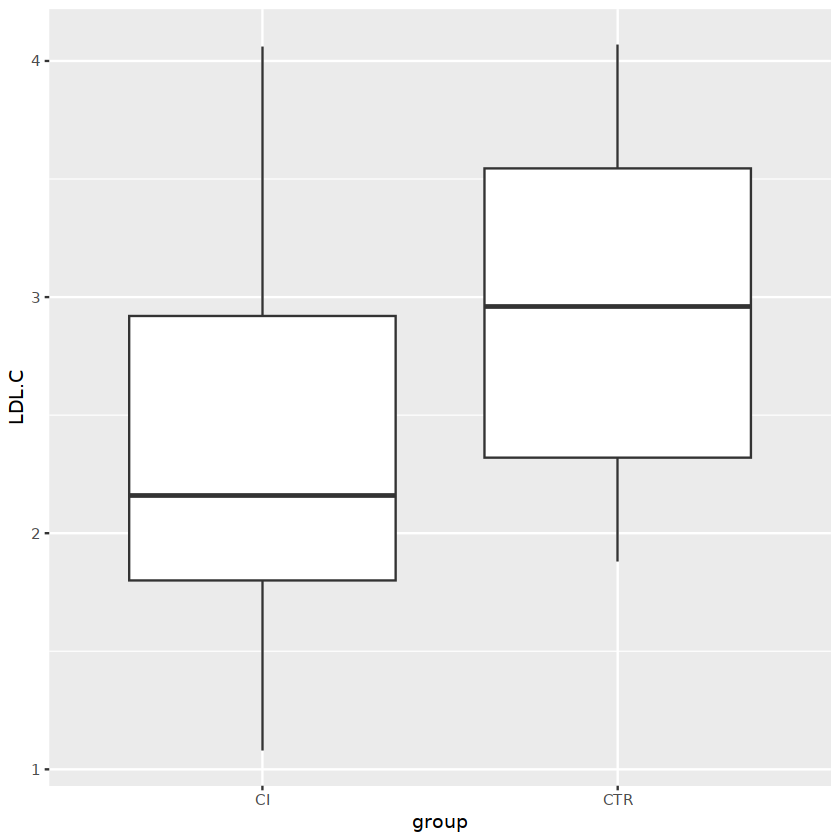

In [131]:
ggplot(data=CS, mapping=aes(x=group, y=LDL.C))+geom_boxplot()

### 不同分型与指标的相关性

In [132]:
# input2 = input2 %>% dplyr::select(-group) 

# group1 = read.csv('./resultstrain/resultstrain.k=2.consensusClass.csv',header =F)



# group1$V2 = paste0('subtype',group1$V2)

# colnames(group1) = c('sample','group')



# count = dplyr::left_join(group1,input2,by = 'sample') 

# for (i in colnames(count)[10:30]){
#     #assign("cc",i)
#         ggplot(count, aes_string(x = 'Hscore', y =i, color = 'group')) +
#     geom_point() +
#     geom_smooth(method=lm, se=FALSE, fullrange=TRUE)+
#     scale_shape_manual(values=c(16, 17))+
#     scale_color_manual(values=c('#E69F00', '#56B4E9'))+
#     theme(legend.position="top")+theme_bw()+stat_cor(data=count, method = "spearman")
#     ggsave(paste0('scor.',i,'.Hscore.pdf'),width = 6,height = 6)
# }


### 协变量多因素

In [133]:
head(input2,2)

,sample,Hscore,FAM200B,BCL2A1,IGJ,TXN,group,gender,age,BMI,...,UA,GLU,TG,TC,HDL.c,LDL.C,ApoA,ApoB,LP,HCY
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,C1,-0.6396225,5.615827,28.66226,37.85341,10.132857,CTR,1,54,21.45329,...,315,5.0,1.1,3.84,1.37,1.88,1.38,0.67,NA,18.1
2,C10,-0.9159736,4.886505,22.32717,21.40125,7.655688,CTR,1,56,25.76298,...,364,5.3,1.4,5.91,1.25,3.51,1.27,1.12,NA,13.5


In [134]:
input3 = input2 %>% dplyr::select(sample,group,gender,age,BMI,GLU, LDL.C,WBC,DBIL)

In [135]:
load('./riskscore.s.rda')

In [136]:
load('diy.rda')

In [137]:
riskscore$fold_predict = risks

In [138]:
riskscore = riskscore %>%   tibble::rownames_to_column(.,'sample')

In [139]:
input4 = dplyr::left_join(input3,riskscore,by = 'sample') %>%  tibble::column_to_rownames(.,'sample')

In [140]:
input4$gender = ifelse(input4$gender == 1,'M','F')

In [141]:
input4$age = ifelse(input4$age < 60,'<60','>=60')

In [142]:
table(input4$group,input4$age)

     
      <60 >=60
  CI   26   16
  CTR  12   19

In [143]:
input4$group = ifelse(input4$group =='CTR',0,1)

In [144]:
input4$group = factor(input4$group,level = c(0,1))

In [145]:
input4$group

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 0 1

In [146]:
head(input4,2)

,group,gender,age,BMI,GLU,LDL.C,WBC,DBIL,fold_predict
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,0,M,<60,21.45329,5.0,1.88,4.51,3.6,12.010528
C10,0,M,<60,25.76298,5.3,3.51,5.22,3.2,9.869423


In [147]:
input4$LDL.C = ifelse(input4$LDL.C  < 3.4 ,'low','high')

In [148]:
library("autoReg")
overall.log =  glm(group~.,data=input4,family=binomial())
model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=1)
model3

name,desc,0 (N=31),1 (N=32),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
gender,F,14 (45.2%),17 (53.1%),genderF,,
,M,17 (54.8%),15 (46.9%),genderM,"0.73 (0.27-1.96, p=.528)","0.21 (0.03-1.61, p=.133)"
age,<60,12 (38.7%),19 (59.4%),age<60,,
,>=60,19 (61.3%),13 (40.6%),age>=60,"0.43 (0.16-1.19, p=.103)","0.17 (0.02-1.53, p=.113)"
BMI,Mean <U+00B1> SD,24.8 <U+00B1> 2.9,26.8 <U+00B1> 5.5,BMI,"1.13 (0.98-1.30, p=.103)","0.97 (0.78-1.19, p=.741)"
GLU,Mean <U+00B1> SD,5.7 <U+00B1> 0.9,6.1 <U+00B1> 1.4,GLU,"1.40 (0.86-2.28, p=.173)","1.71 (0.77-3.77, p=.187)"
LDL.C,high,12 (38.7%),4 (12.5%),LDL.Chigh,,
,low,19 (61.3%),28 (87.5%),LDL.Clow,"4.42 (1.24-15.79, p=.022)","4.49 (0.32-62.43, p=.263)"
WBC,Mean <U+00B1> SD,5.2 <U+00B1> 1.2,6.1 <U+00B1> 2.4,WBC,"1.29 (0.95-1.74, p=.098)","0.74 (0.40-1.34, p=.315)"


In [111]:
input5 = dplyr::left_join(input2,riskscore,by = 'sample') %>%  tibble::column_to_rownames(.,'sample')

In [112]:
colnames(input5)

[1] "Hscore"       "FAM200B"      "BCL2A1"       "IGJ"          "TXN"         
 [6] "group"        "gender"       "age"          "BMI"          "Hb"          
[11] "RBC"          "WBC"          "PLT"          "ALT"          "AST"         
[16] "TBIL"         "DBIL"         "CR"           "BUN"          "UA"          
[21] "GLU"          "TG"           "TC"           "HDL.c"        "LDL.C"       
[26] "ApoA"         "ApoB"         "LP"           "HCY"          "fold_predict"

In [113]:

for (i in colnames(input5)[9:29]){
    #assign("cc",i)
        ggplot(input5, aes_string(x = 'fold_predict', y =i, color = 'group')) +
    geom_point() +
    geom_smooth(method=lm, se=FALSE, fullrange=TRUE)+
    scale_shape_manual(values=c(16, 17))+
    scale_color_manual(values=c('#E69F00', '#56B4E9'))+
    theme(legend.position="top")+theme_bw()+stat_cor(data=input5, method = "spearman")
    ggsave(paste0('fold_predict-cor.',i,'.Hscore.pdf'),width = 6,height = 6)
}


Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 8 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 8 rows containing non-finite outside the scale range (`stat_cor()`)."
Warning message:
"Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_cor()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`s